In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cust_df = pd.read_excel("Customer Churn Data.xlsx", engine="openpyxl", sheet_name="Data for DSBA")

In [6]:
cust_df.head()

#how is login device important for understanding customer churn?
#Does city_Tier has any relation with churning of customer?
#rev_per_month and rev_growth_yoy do they have any relation?

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [7]:
cust_df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [294]:
cust_df.shape

(11260, 19)

In [9]:
cust_df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [10]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [11]:
cust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


## 1. Checking  Bad data, Null Values, and Wrongly marked Datatype 

In [12]:
cust_df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [13]:
cust_df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [14]:
#Tenure wrongly marked as object , bad data

In [15]:
cust_df.isnull().sum().sum()

2676

In [16]:
cust_df.duplicated().sum() #no duplicated entries

0

In [17]:
#numeric datatype

1. Tenure
  
   Bad data : # marked - 116
   
   Null values : 102
   
   Miskenly marked as object datatype

In [18]:
cust_df['Tenure'].value_counts().sort_values(ascending=True) 
#bad data 
#mistakely marked as object datatype

61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
27     131
99     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64

In [19]:
cust_df['Tenure'].mode()

0    1
dtype: object

In [20]:
cust_df[cust_df['Tenure'].isnull()==True] #null values present 

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
84,20084,0,NaN,1.0,6.0,Credit Card,Male,3.0,3,HNI,5.0,Married,8,0.0,16,0,3,193.96,Mobile
92,20092,1,NaN,1.0,6.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,1,0.0,14,0,5,120.58,Mobile
259,20259,0,NaN,3.0,8.0,Credit Card,Male,3.0,4,HNI,3.0,Divorced,2,0.0,13,9,0,175.96,Mobile
565,20565,0,NaN,1.0,18.0,Credit Card,Female,2.0,3,Super,2.0,Divorced,1,1.0,11,0,5,158.55,Mobile
568,20568,1,NaN,3.0,9.0,Debit Card,Male,2.0,4,HNI,2.0,Divorced,2,1.0,11,3,7,203.25,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,30552,1,NaN,1.0,15.0,Debit Card,Male,3.0,4,Regular Plus,5.0,Married,11,1.0,15,1,3,150.42,Computer
10723,30723,0,NaN,1.0,13.0,Cash on Delivery,Male,3.0,4,Regular Plus,5.0,Single,8,0.0,14,2,3,145.8,Mobile
10846,30846,1,NaN,3.0,10.0,Cash on Delivery,Male,4.0,4,Regular Plus,3.0,Married,5,0.0,18,2,3,156.09,Computer
10959,30959,0,NaN,1.0,21.0,Credit Card,Female,3.0,2,Regular Plus,3.0,Married,11,0.0,19,1,3,160.17,Mobile


2. City_Tier
  
   Bad data : No
   
   Null values : 112
   
   Miskenly marked as float datatype - categorical variable
   
   Mostly where gender is marked as M and F

In [21]:
cust_df['City_Tier'].value_counts()  #datatype as float but seems to be categorical

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [22]:
cust_df[cust_df['City_Tier'].isnull()==True]

#how can we impute the values for city tier with simple imputation through mode
#We would be required to check the city as well

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
10,20010,1,4,NaN,18.0,Cash on Delivery,F,2.0,3,Regular,3.0,Divorced,2,0.0,12,9,8,295.45,Mobile
224,20224,0,2,NaN,8.0,Debit Card,M,3.0,3,Super,3.0,Divorced,2,0.0,14,1,2,146.49,Computer
339,20339,0,10,NaN,6.0,Cash on Delivery,F,2.0,3,HNI,2.0,Single,5,0.0,17,1,2,174.91,Mobile
475,20475,0,5,NaN,10.0,Debit Card,F,3.0,4,Super,3.0,Divorced,2,0.0,12,1,8,161.62,Mobile
572,20572,0,2,NaN,26.0,Cash on Delivery,F,2.0,3,Regular Plus,2.0,Divorced,2,0.0,15,0,2,121.57,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10927,30927,0,1,NaN,37.0,UPI,F,3.0,5,Regular Plus,3.0,Married,4,1.0,16,2,4,154.14,Computer
10990,30990,0,18,NaN,11.0,Debit Card,F,3.0,4,Regular Plus,1.0,Married,10,1.0,19,3,3,161.95,Mobile
10993,30993,0,27,NaN,35.0,Credit Card,M,3.0,2,HNI,1.0,Married,7,0.0,17,1,3,201.05,Mobile
11120,31120,0,17,NaN,19.0,Credit Card,F,3.0,5,Regular,3.0,Married,12,0.0,16,7,15,322.92,Mobile


3. CC_Contacted_LY
  
   Bad data : No
    
   Null values : 102
    
   Can be simply imputed through median [outliers]
   
   Mostly where gender is marked as M and F

In [23]:
cust_df['CC_Contacted_LY'].value_counts() # can be imputed through median

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
5.0        8
43.0       8
4.0        1
129.0      1
132.0      1
127.0      1
126.0      1
Name: CC_Contacted_LY, dtype: int64

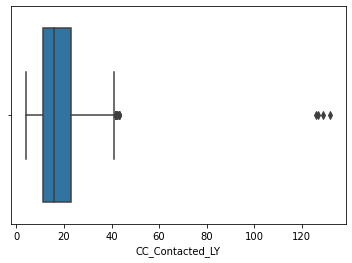

In [24]:
sns.boxplot(cust_df['CC_Contacted_LY'])

In [25]:
cust_df[cust_df['CC_Contacted_LY'].isnull()==True]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
184,20184,0,4,1.0,NaN,Cash on Delivery,M,2.0,3,Regular Plus,2.0,Divorced,1,1.0,12,0,3,148.21,Mobile
207,20207,0,27,1.0,NaN,Debit Card,F,2.0,3,Super,3.0,Single,4,0.0,12,1,3,148.69,Computer
244,20244,0,4,1.0,NaN,Debit Card,M,2.0,4,Regular Plus,4.0,NaN,1,1.0,16,1,2,126.57,Mobile
466,20466,1,0,3.0,NaN,E wallet,F,3.0,3,Super,5.0,Single,6,0.0,15,1,2,153.24,Mobile
590,20590,0,6,1.0,NaN,UPI,F,2.0,1,Super,4.0,Divorced,2,1.0,13,0,2,154.88,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,30907,0,8,1.0,NaN,Debit Card,M,3.0,4,Super,1.0,Married,11,0.0,19,1,2,180.84,Mobile
10971,30971,0,23,1.0,NaN,Debit Card,F,3.0,5,Super Plus,3.0,Married,5,1.0,21,3,13,265.66,Mobile
11026,31026,1,1,3.0,NaN,E wallet,M,4.0,5,Super,5.0,Married,11,1.0,15,2,3,187.34,Mobile
11080,31080,1,1,1.0,NaN,Debit Card,M,4.0,4,Super,5.0,Married,10,0.0,18,1,8,184.46,Computer


4. Payment
  
   Bad data : No
    
   Null values : 109
    
   Can be simply imputed through mode 
   
   Mostly where gender is marked as M and F

In [26]:
cust_df['Payment'].dtype

dtype('O')

In [27]:
cust_df['Payment'].value_counts() 
# can be imputed through mode
# would mode be appropriate - are all of these more than 18, all carrying Debit Card

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [28]:
cust_df[cust_df['Payment'].isnull()==True]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
39,20039,0,0,1.0,9.0,NaN,M,3.0,4,Regular Plus,3.0,Married,2,1.0,15,0,1,125.66,&&&&
49,20049,0,18,3.0,10.0,NaN,F,1.0,3,Super,5.0,Married,5,1.0,11,0,3,150.06,&&&&
75,20075,0,0,1.0,6.0,NaN,M,2.0,4,Super,5.0,Divorced,6,0.0,19,0,0,142.98,&&&&
143,20143,0,18,1.0,26.0,NaN,M,3.0,3,Super Plus,2.0,Divorced,1,1.0,14,0,10,234.96,&&&&
427,20427,0,29,1.0,15.0,NaN,M,2.0,3,Super Plus,2.0,Divorced,8,0.0,11,0,1,211.03,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,30593,0,8,1.0,16.0,NaN,M,3.0,5,Regular Plus,1.0,Married,9,0.0,19,1,1,161.79,&&&&
10831,30831,0,2,3.0,16.0,NaN,M,3.0,4,Super,5.0,Single,2,0.0,21,1,4,215.63,&&&&
11081,31081,1,1,1.0,19.0,NaN,M,3.0,4,Super,5.0,Single,5,0.0,16,1,9,169.13,&&&&
11130,31130,0,10,3.0,24.0,NaN,F,4.0,5,Super,3.0,Married,4,1.0,15,1,8,185.73,&&&&


5. Gender
  
   Bad data : Marked as M and F
    
   Null values : 108 [ Mostly where gender is marked as M and F]

In [29]:
cust_df['Gender'].value_counts()
#bad data
#adding F to Female and M to Male

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

6. Service_Score
  
   Bad data : No
    
   Null values : 98 
   
   Mostly where gender is marked as M and F
    
   Marked as Numerical but categorical.

In [30]:
cust_df['Service_Score'].value_counts() #categorical

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [31]:
cust_df[cust_df['Service_Score'].isnull()==True]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
116,20116,0,5,3.0,32.0,E wallet,M,NaN,3,Super,2.0,Divorced,1,0.0,18,1,2,144.65,&&&&
243,20243,1,3,3.0,28.0,E wallet,M,NaN,4,Super,3.0,Divorced,3,1.0,12,1,0,163.8,&&&&
459,20459,0,15,1.0,14.0,Debit Card,M,NaN,3,Regular,2.0,Married,2,0.0,13,0,9,284.3,&&&&
623,20623,1,0,3.0,35.0,Credit Card,M,NaN,5,Super,5.0,Single,9,0.0,18,0,2,149.69,&&&&
1161,21161,0,13,1.0,8.0,Debit Card,F,NaN,3,Regular Plus,5.0,Married,5,0.0,17,1,2,133.77,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,30776,0,13,3.0,31.0,Debit Card,M,NaN,5,Super,1.0,Married,5,1.0,15,1,5,191.2,&&&&
10843,30843,0,31,1.0,12.0,Debit Card,M,NaN,2,Super,3.0,Married,4,0.0,26,2,9,179,&&&&
10855,30855,0,29,1.0,18.0,Debit Card,M,NaN,4,Super,3.0,Married,3,1.0,18,2,3,168.35,&&&&
10913,30913,0,9,1.0,20.0,Credit Card,F,NaN,4,Super,3.0,Single,7,1.0,18,1,5,193.42,&&&&


7. Account_user_count
  
   Bad data : 332 marked as @
    
   Null values : 98  [impute through mode]
   
   Marked as object (due to bad data) also it's categorical.

In [32]:
cust_df['Account_user_count'].value_counts()
#bad data 
#datatype object 

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [33]:
cust_df['Account_user_count'].isnull().sum()

112

In [34]:
cust_df[cust_df['Account_user_count'].isnull()==True]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
79,20079,1,1,1.0,35.0,Credit Card,Male,3.0,NaN,Super,5.0,Divorced,8,1.0,19,0,0,166.73,Mobile
215,20215,0,10,1.0,11.0,Credit Card,Male,3.0,NaN,Super,2.0,Married,8,0.0,16,0,4,163.47,Mobile
465,20465,0,6,1.0,13.0,Credit Card,Male,2.0,NaN,HNI,3.0,Divorced,1,0.0,11,0,7,216.91,Mobile
486,20486,0,8,1.0,13.0,UPI,Male,2.0,NaN,HNI,3.0,Single,4,0.0,21,0,6,202.21,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,30918,0,10,1.0,17.0,Debit Card,Male,4.0,NaN,Super,5.0,Married,6,1.0,16,1,3,180.62,Computer
11002,31002,0,8,1.0,30.0,Debit Card,Female,3.0,NaN,Regular Plus,1.0,Married,3,0.0,15,2,8,156.29,Mobile
11071,31071,1,1,3.0,37.0,Debit Card,Male,3.0,NaN,Super,1.0,Single,4,1.0,19,4,8,190.13,Mobile
11217,31217,0,14,1.0,15.0,Debit Card,Male,3.0,NaN,Regular Plus,1.0,Married,10,0.0,20,2,1,149.06,Mobile


8. account_segment
  
   Bad data : Super Plus as Super + , Regular Plus as Regular +
    
   Null values : 97  [impute through mode]
   
   

In [35]:
cust_df['account_segment'].value_counts()
#bad data

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [36]:
cust_df['account_segment'].isnull().sum()

97

In [37]:
cust_df[cust_df['account_segment'].isnull()==True]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
20,20020,1,0,3.0,12.0,Debit Card,Male,3.0,5,NaN,3.0,Divorced,5,1.0,18,6,7,161.72,Mobile
400,20400,1,0,3.0,9.0,Debit Card,Female,3.0,3,NaN,3.0,Single,10,0.0,14,1,0,145.77,Mobile
538,20538,1,0,1.0,24.0,UPI,Female,3.0,3,NaN,2.0,Single,2,0.0,19,1,0,126.93,Mobile
652,20652,1,0,1.0,16.0,Debit Card,Female,2.0,4,NaN,5.0,Single,2,0.0,13,1,0,114.16,Mobile
721,20721,0,8,1.0,8.0,Debit Card,Male,2.0,4,NaN,4.0,Married,3,0.0,18,6,4,202.74,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10978,30978,0,3,3.0,15.0,Credit Card,Male,3.0,5,NaN,4.0,Married,7,1.0,15,1,10,166.87,Mobile
10987,30987,0,1,3.0,20.0,Debit Card,Male,3.0,4,NaN,5.0,Single,6,0.0,13,1,3,156.28,Mobile
11020,31020,0,1,1.0,40.0,Credit Card,Male,4.0,4,NaN,5.0,Married,6,0.0,16,2,3,164.07,Mobile
11153,31153,0,7,3.0,22.0,E wallet,Male,3.0,4,NaN,3.0,Single,4,0.0,15,1,10,179.87,Mobile


9. CC_Agent_Score
  
   Bad data : No
    
   Null values : 116  [impute through mode]
   
   Marked as Numerical but categorical.

In [38]:
cust_df['CC_Agent_Score'].value_counts() #imputing through mode 

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [39]:
cust_df['CC_Agent_Score'].isnull().sum()

116

10. Marital_Status
  
   Bad data : No
    
   Null values : 212  [impute through mode]
    
   Merge Single and Divorced?

In [40]:
cust_df['Marital_Status'].value_counts() 

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [41]:
cust_df[cust_df['Marital_Status'].isnull()==True]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
169,20169,0,10,1.0,15.0,Credit Card,Male,2.0,3,Regular Plus,2.0,NaN,2,1.0,12,0,2,123.26,Computer
229,20229,0,3,3.0,31.0,Cash on Delivery,Female,2.0,3,Super,3.0,NaN,8,1.0,12,1,2,147.36,Computer
244,20244,0,4,1.0,NaN,Debit Card,M,2.0,4,Regular Plus,4.0,NaN,1,1.0,16,1,2,126.57,Mobile
273,20273,0,10,1.0,31.0,Credit Card,Female,3.0,3,Super,3.0,NaN,4,1.0,15,3,7,144.49,Computer
290,20290,1,0,3.0,12.0,E wallet,Female,2.0,5,Regular Plus,3.0,NaN,1,0.0,16,1,0,123.51,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,30988,0,7,3.0,30.0,Debit Card,Female,3.0,4,Super,1.0,NaN,5,1.0,28,1,3,182.68,Computer
10991,30991,1,1,1.0,18.0,Credit Card,Male,4.0,5,Regular Plus,3.0,NaN,5,1.0,14,2,3,169.89,Mobile
10995,30995,1,1,1.0,13.0,Debit Card,Male,4.0,4,Regular Plus,4.0,NaN,6,0.0,15,1,1,139.93,Mobile
11086,31086,0,4,1.0,23.0,Credit Card,Female,4.0,4,HNI,3.0,NaN,11,0.0,16,1,3,221.67,Mobile


11. rev_per_month
  
   Bad data : 689 marked +  [how can we impute it- mode?]
    
   Null values : 102  [impute through mode]
    
   Marked as categorical but numerical

In [42]:
cust_df['rev_per_month'].isnull().sum()

102

In [43]:
cust_df['rev_per_month'].value_counts() 
#a plus sign
#object datatype
#null values are there as well 11158

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
124       5
123       5
107       5
140       4
136       4
133       4
129       4
118       4
115       3
138       3
119       3
126       3
130       3
127       3
137       3
101       3
117       3
108       3
116       3
110       3
113       3
105       2
134       2
22        2
114       2
125       2
19        2
139       2
120       2
121       2
131       2
135       1
21        1
122       1
20        1
23        1
25        1
100       1
103       1
104       1
111       1
109       1
Name: rev_per_month, dtype: int64

12. Complain_ly
  
    Bad data : No
    
    Null values : 357  [impute through mode?]
    

In [44]:
cust_df['Complain_ly'].value_counts() 
#null values present 
#categorical variable

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [45]:
cust_df[cust_df['Complain_ly'].isnull()==True]

#all rev_per_month named + seems to be NaN in Complain_ly

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
19,20019,1,19,1.0,20.0,Debit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,18,1,3,149.63,Mobile
38,20038,0,30,1.0,30.0,Debit Card,Male,2.0,2,HNI,2.0,Married,+,NaN,16,1,4,194.39,Mobile
60,20060,0,6,1.0,20.0,Credit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,13,0,6,127.56,Mobile
65,20065,0,25,1.0,6.0,Debit Card,Male,3.0,4,Regular,3.0,Divorced,+,NaN,14,1,9,299.99,Mobile
158,20158,0,28,1.0,26.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,+,NaN,19,1,8,154.15,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,31161,0,30,3.0,23.0,E wallet,Female,3.0,5,Super,5.0,Married,+,NaN,19,1,1,180.8,Mobile
11194,31194,0,16,1.0,37.0,Debit Card,Male,3.0,5,Super,3.0,Single,+,NaN,13,4,8,171.32,Computer
11203,31203,0,1,1.0,13.0,UPI,Male,3.0,4,Regular +,3.0,Married,+,NaN,20,1,3,170.77,Mobile
11227,31227,0,13,1.0,20.0,Debit Card,Male,3.0,4,Regular,1.0,Single,+,NaN,15,2,4,325.31,Computer


13. rev_growth_yoy
  
    Bad data : 3 marked as $
     
    Null values : 0 
     
    Marked as categorical (bad data) change it to numerical

In [46]:
cust_df['rev_growth_yoy'].value_counts() 
#bad data
#no null values
#object datatype

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [47]:
cust_df['rev_growth_yoy'].isnull().sum()

0

14. coupon_used_for_payment
  
    Bad data :  $ * and #  [mode]
     
    Null values : 0 
    
    Datatypes marked as categorical changed to numerical

In [48]:
cust_df['coupon_used_for_payment'].value_counts() 
#bad data $ * # 
#no null entries

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
*        1
#        1
$        1
Name: coupon_used_for_payment, dtype: int64

In [49]:
cust_df['coupon_used_for_payment'].isnull().sum()

0

15. Day_Since_CC_connect
  
    Bad data :  $  [mode or median]
     
    Null values : 357 
    
    Datatypes marked as categorical changed to numerical

In [50]:
cust_df['Day_Since_CC_connect'].value_counts() 
#bad data $

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
47       2
30       2
31       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [51]:
cust_df['Day_Since_CC_connect'].isnull().sum()

357

16. cashback
  
    Bad data :  $ for two values  [ median]
     
    Null values : 471 
    
    Datatypes marked as categorical change to numerical
    
    Can we round of values to two places in the column?

In [52]:
cust_df['cashback'].dtype #there is some bad data

dtype('O')

In [53]:
cust_df['cashback'].isnull().sum()

471

In [54]:
cust_df['cashback'].value_counts() 

155.62    10
149.36     9
152.28     9
154.73     9
149.68     9
          ..
245.64     1
141.00     1
126.94     1
326.59     1
200.31     1
Name: cashback, Length: 5693, dtype: int64

In [55]:
cust_df['cashback'].tolist() #how to look for bad data

[159.93,
 120.9,
 nan,
 134.07,
 129.6,
 139.19,
 120.86000000000001,
 122.93,
 126.83000000000001,
 122.93,
 295.45,
 153.81,
 134.41,
 133.88,
 196.19,
 120.72999999999999,
 129.26,
 157.44,
 160.74,
 149.63,
 161.72,
 203.12,
 116.75,
 nan,
 206.5,
 142,
 172.95,
 123.06,
 123.47999999999999,
 189.98,
 143.19,
 1974,
 133.46,
 208.55,
 122.31,
 123.22999999999999,
 120.24000000000001,
 127.13,
 194.39,
 125.66,
 299.26,
 124.50999999999999,
 194.19,
 186.86,
 130.38,
 130.58,
 123.25,
 120.88,
 130.72,
 150.06,
 142.57,
 125,
 111.02000000000001,
 204.53,
 122.88,
 139.29,
 123.11000000000001,
 131.4,
 nan,
 144.5,
 127.56,
 290.33,
 287.22,
 195.47,
 237.33999999999997,
 299.99,
 122.78999999999999,
 159.16,
 120.88999999999999,
 267.92,
 135.64,
 144.25,
 152.65,
 165.53,
 162.61,
 142.98,
 168.04,
 138.15,
 127.41,
 166.73,
 176.39,
 123.28,
 121.53,
 148.76,
 193.96,
 204,
 184.74,
 199.81,
 224.89999999999998,
 126.57,
 235.91000000000003,
 166.96,
 120.58000000000001,
 188.65,

In [56]:
cust_df[cust_df['cashback']=="$"]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,20440,0,0,1.0,16.0,Credit Card,Male,3.0,2,Regular Plus,3.0,Single,2,0.0,18,1,2,$,Mobile
1257,21257,0,4,1.0,9.0,Credit Card,Male,2.0,3,Regular +,5.0,Married,+,NaN,13,0,3,$,Computer


17. Login_device
  
    Bad data :  &&&&  [mode or median]
     
    Null values : 221
        
    [Should I merge it with Mobile - mode of the column - or make it a seperate entry other device?]
    
    Datatypes marked as categorical change to numerical

In [57]:
cust_df['Login_device'].value_counts() 
#&&&& bad
#null values present 

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [58]:
cust_df['Login_device'].isnull().sum()

221

In [59]:
#code for imputation 

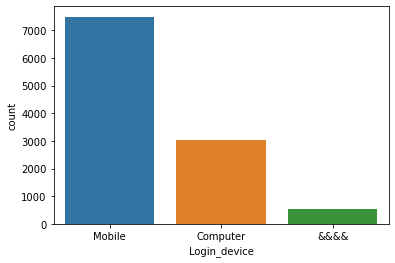

In [60]:
#univariate Analysis
sns.countplot(cust_df['Login_device'])